## This notebook generates the components of Extended Data Figure 1 

in "Entrained debris records regrowth of the Greenland Ice Sheet after the last interglacial" 

---
That figure contains the following components

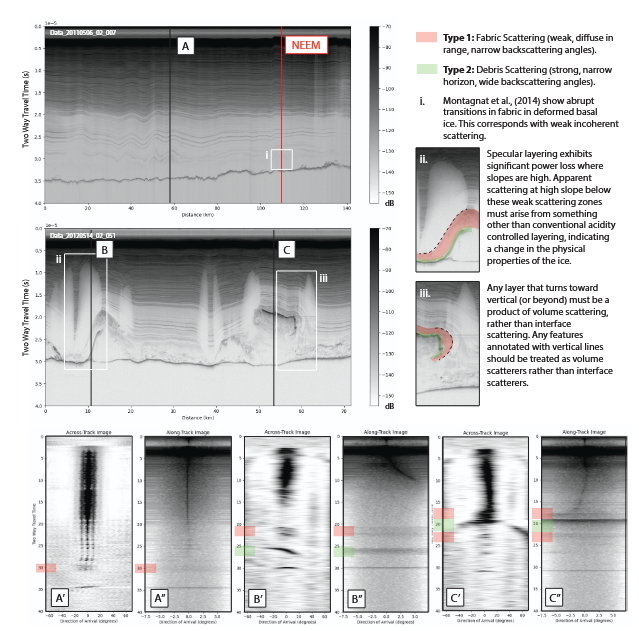

In [1]:
#############################################
### Necessary input statements

######## System untilities
import os
import shutil
import sys
import glob

######## Numerical and plotting tools
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['pdf.fonttype'] = 42

######## Any necessary path additions can go here:
sys.path.append('/mnt/data01/Code/opr_python/')

######## OPR library tools
import opr_python as ndh

data_root = '/mnt/data02/Dataverse_TestData/EntrainedDebris/'
generate_pdfs_flag = 0

In [2]:
########################################
### Get the NEEM Core Coordinate Information
neem_lat = 77.45
neem_lon = -51.05

neem_xy = ndh.polarstereo_fwd(neem_lat,neem_lon)

In [3]:
###########################################################
### Load radar data necessary for the first image generation:

fstring = ['Data_20110506_02_006','Data_20110506_02_007','Data_20110506_02_008']

file_list_sar = []
file_list_music = []

for file_target in fstring:
    file_list_music.append(data_root+'Music_'+file_target+'.mat')
    file_list_sar.append(data_root+'SLC_'+file_target+'.mat')

radar_data,depth_data = ndh.radar_load(file_list_sar)
music_data = ndh.radar_load_music(file_list_music)
dd1 = ndh.delay_doppler(radar_data)

Fixed parameter structure


/mnt/data01/Code/opr_python/opr_python/elevation_shift.py:130: ComplexWarning: Casting complex values to real discards the imaginary part
  new_data1[np.arange(len(select_inds)),i] = data[select_inds.astype(int),i]


Center Frequency: 195000000.0


100%|██████████████████████████████████████| 2843/2843 [00:05<00:00, 567.01it/s]


/tmp/ipykernel_3955565/2635315888.py:6: RuntimeWarning: divide by zero encountered in log10
  imdata = plt.imshow(10*np.log10(np.abs(depth_data['new_data'])**2),


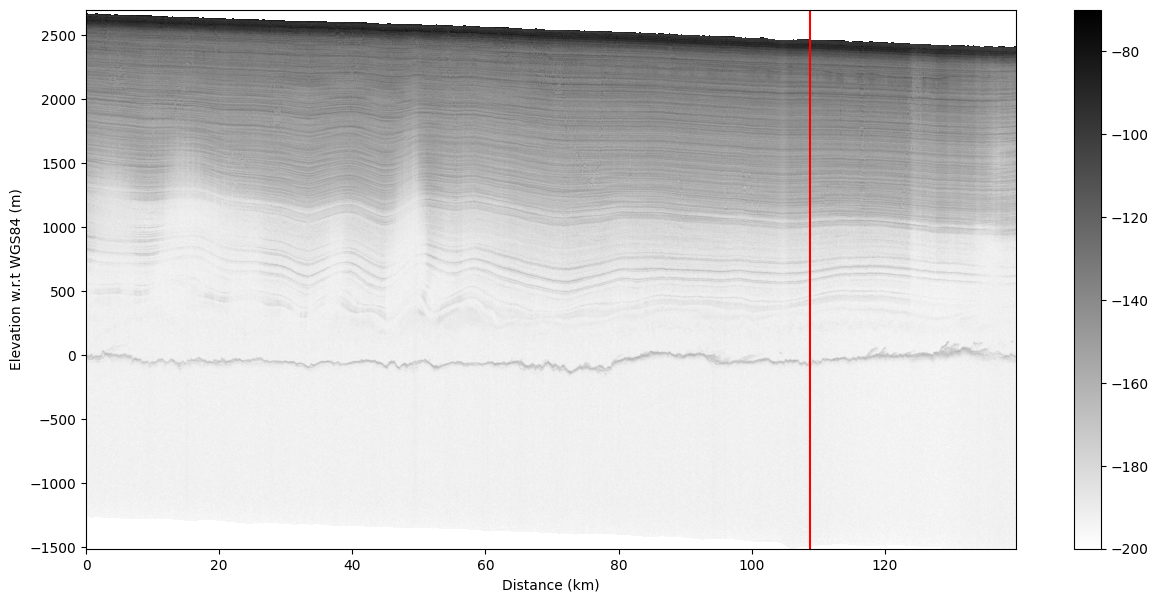

In [4]:
###########################################################
### Generate the first Nadir Image

fig = plt.figure(figsize=(15,7))
imdata = plt.imshow(10*np.log10(np.abs(depth_data['new_data'])**2),
                    extent=[radar_data['distance'][0]/1000,radar_data['distance'][-1]/1000,
                            depth_data['depth_axis'][0],depth_data['depth_axis'][-1]],
                    origin='lower',aspect='auto',cmap='gray_r')    
            
           
cbar = plt.colorbar(imdata)
ax = plt.gca()
ax.invert_yaxis()
plt.xlabel('Distance (km)')
plt.ylabel('Elevation w.r.t WGS84 (m)')

target_dist_ind = ndh.find_nearest_xy(np.stack([radar_data['x'],radar_data['y']]).T,np.stack([neem_xy['x'],neem_xy['y']]).T)
plt.axvline(radar_data['distance'][target_dist_ind['index'][0]]/1000,c='red')

im = plt.gci()
im.set_clim(vmin=-200, vmax=-70)

Fixed parameter structure


(4e-05, 0.0)

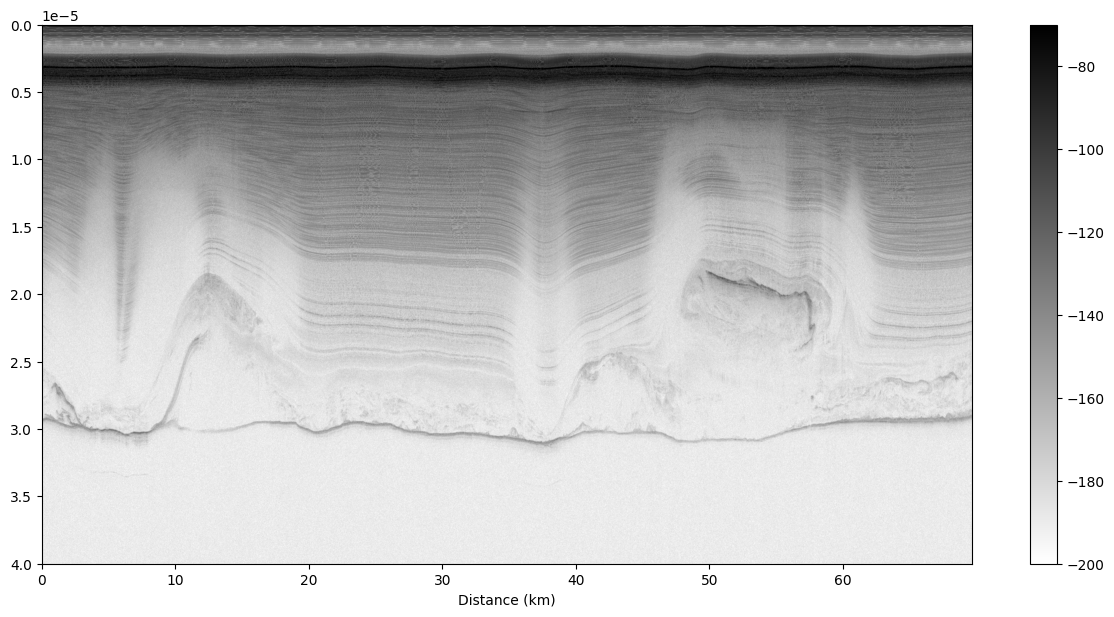

In [5]:
###########################################################
### Load radar data necessary for the first image generation:

fstring = ['Data_20120514_02_051','Data_20120514_02_052']

file_list_sar = []
file_list_music = []

for file_target in fstring:
    file_list_music.append(data_root+'Music_'+file_target+'.mat')
    file_list_sar.append(data_root+'SLC_'+file_target+'.mat')

radar_data,depth_data = ndh.radar_load(file_list_sar,1,0)
target_dist_ind = ndh.find_nearest_xy(np.stack([radar_data['x'],radar_data['y']]).T,np.stack([neem_xy['x'],neem_xy['y']]).T)

im = plt.gci()
im.set_clim(vmin=-200, vmax=-70)
#plt.gca().set_ylim(-300,2300)
plt.gca().set_ylim(40e-6,0)

Fixed parameter structure


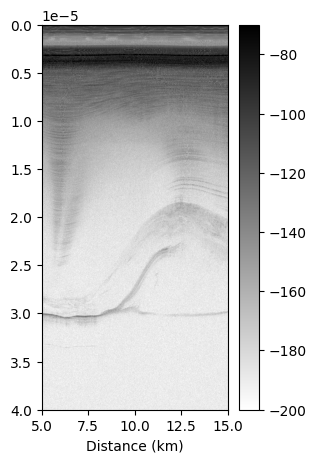

In [6]:
radar_data,depth_data = ndh.radar_load(file_list_sar,1,0)
im = plt.gci()
im.set_clim(vmin=-200, vmax=-70)
plt.gca().set_ylim(40e-6,0)
plt.gca().set_xlim(5,15)
plt.gcf().set_size_inches(3, 5)

Fixed parameter structure


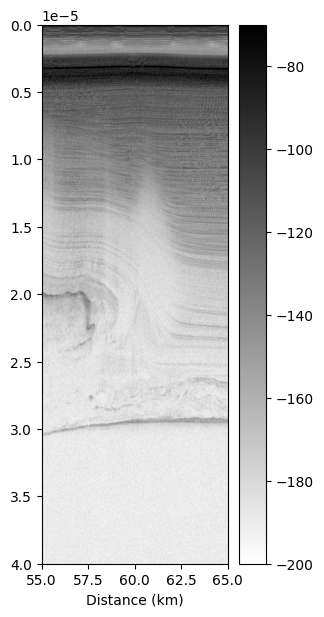

In [7]:
radar_data,depth_data = ndh.radar_load(file_list_sar,1,0)
im = plt.gci()
im.set_clim(vmin=-200, vmax=-70)
plt.gca().set_ylim(40e-6,0)
plt.gca().set_xlim(55,65)
plt.gcf().set_size_inches(3, 7)

Fixed parameter structure


/mnt/data01/Code/opr_python/opr_python/radar_load.py:188: RuntimeWarning: divide by zero encountered in log10
  imdata = plt.imshow(10*np.log10(np.real(depth_data['new_data'])**2),


Center Frequency: 195000000.0


100%|██████████████████████████████████████| 1420/1420 [00:02<00:00, 523.10it/s]


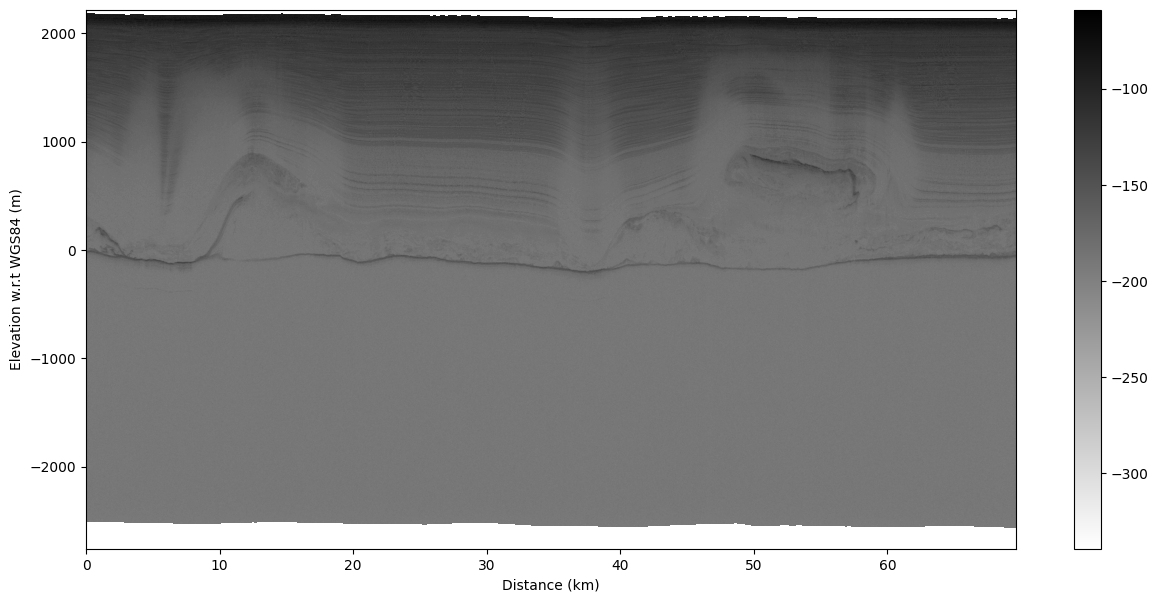

In [8]:
radar_data,depth_data = ndh.radar_load(file_list_sar,1)

dd1 = ndh.delay_doppler(radar_data)
music_data = ndh.radar_load_music(file_list_music)

After Generating the Writer, include the following:
Outside the loop:      with writer.saving(fig, videoname, 100):
To capture a frame:    writer.grab_frame()
Using the FFMpeg writer


 38%|███████████████▌                         | 108/284 [02:40<04:20,  1.48s/it]

KeyboardInterrupt



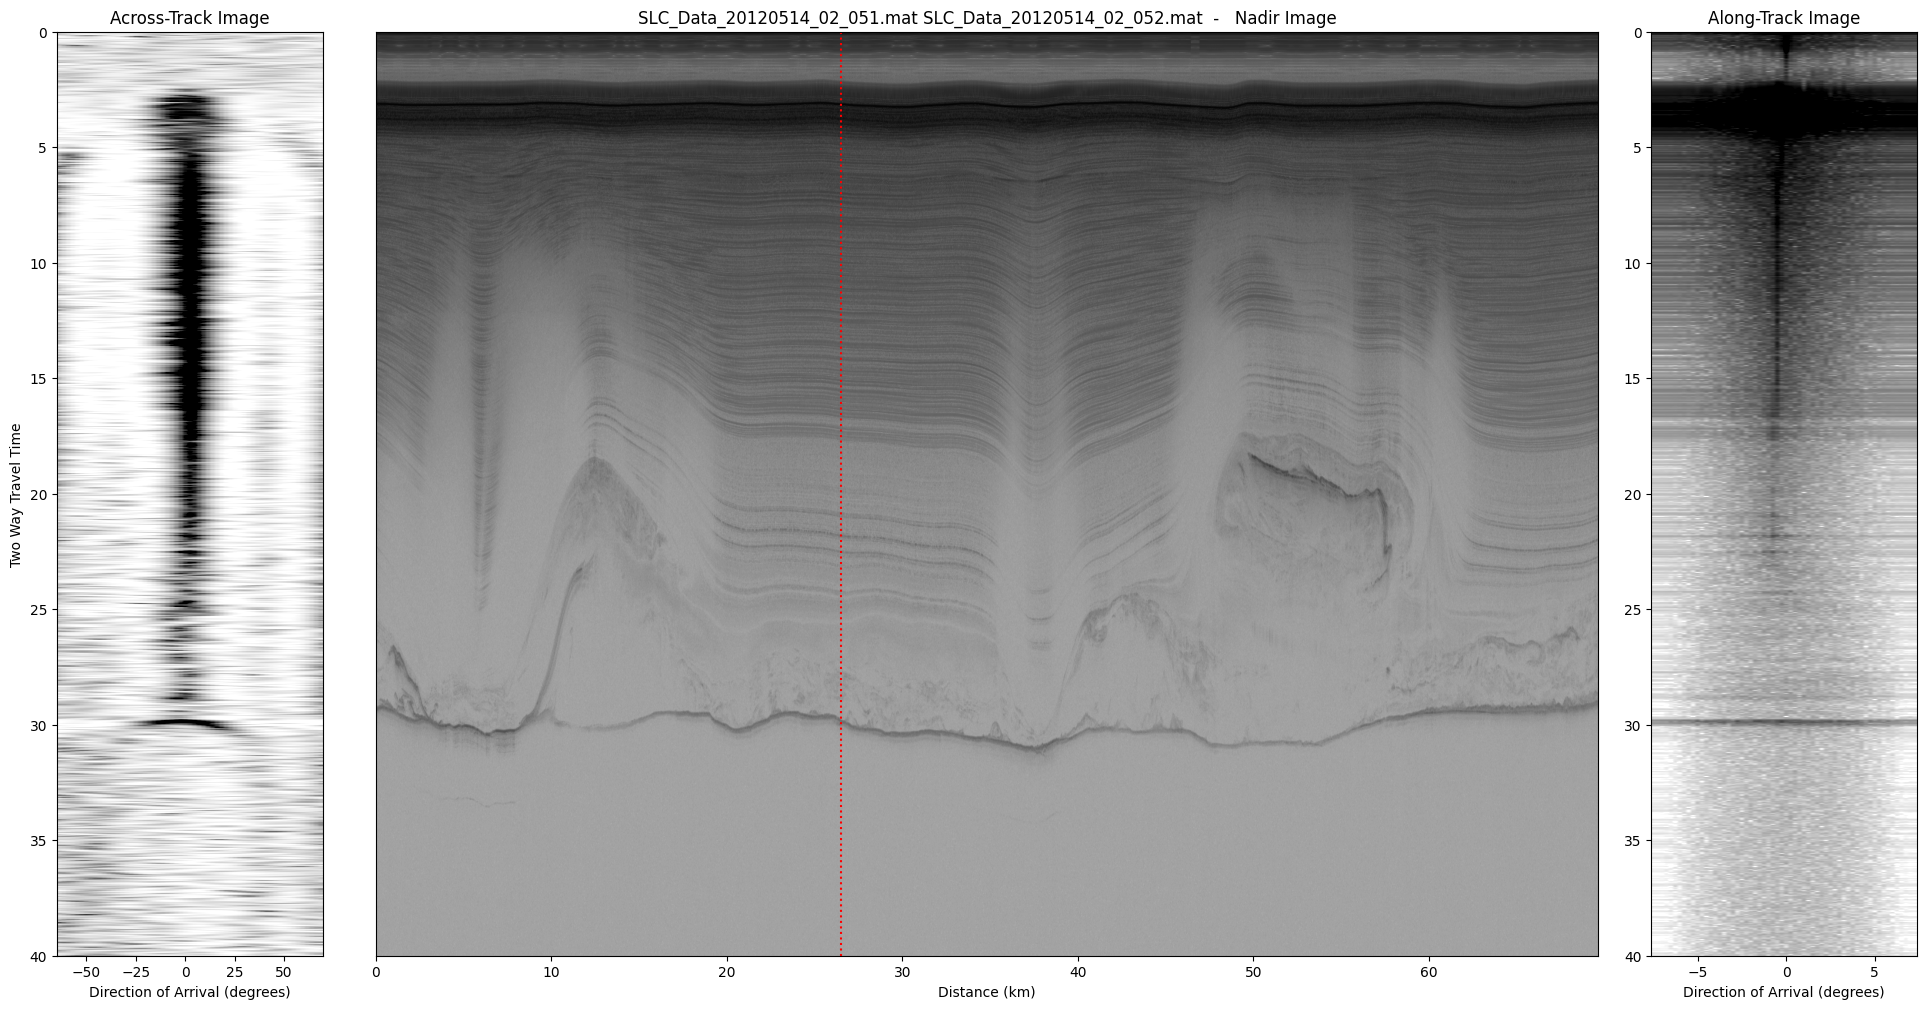

In [9]:
ndh.animate_delay_doppler_music('SlopeImages.mp4',radar_data,depth_data,music_data,dd1,5,40)

In [ ]:
ndh.show_video('SlopeImages.mp4')